# Breast Cancer Detection 📊

This notebook performs a brief analysis on the `breast-cancer.csv` dataset. Namely, it addresses the following questions.

 - Which features impact the diagnosis the most?
 - How do the numbers differ between different diagnosis?
 - How are the numbers distributed?

Please refer to the `.md` cells throughout the notebook for more perspective.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Projects/dmodel-breast-cancer/breast-cancer.csv'
df = pd.read_csv(FILE_PATH)
df.shape

(569, 32)

In [100]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Exploratory Data Analysis

Let's answer the aforementioned questions using EDA.

**Q1: What features affect the diagnosis the most?**

We can answer this by plotting a heatmap which shows correlation between features and the target column.

In [101]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [102]:
corr = df.drop(columns=['id']).corr(method='pearson').iloc[1:, 0].sort_values(ascending=False)
corr.head(5)

,diagnosis
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636


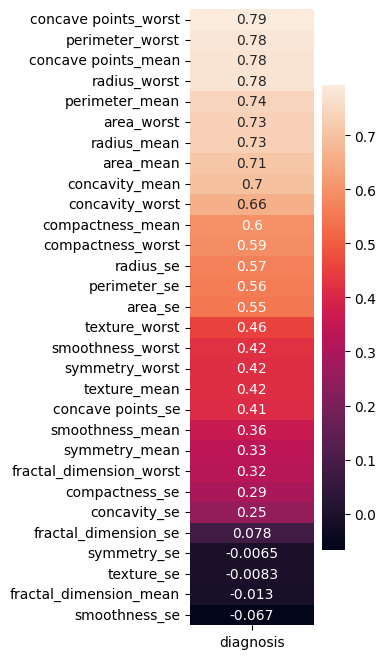

In [103]:
plt.figure(figsize=(2, 8))
sns.heatmap(corr.to_frame(), annot=True)
plt.show()

**Q2. How do the numbers differ between different diagnosis?**

**Q3. How are the numbers distributed?**

For these questions, we will only consider the top 3 most correlated features.

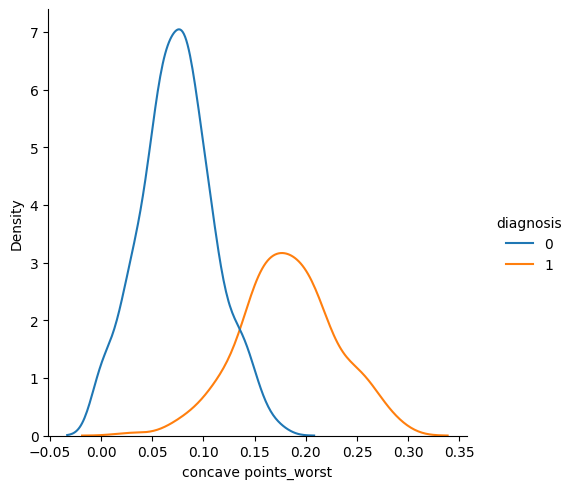

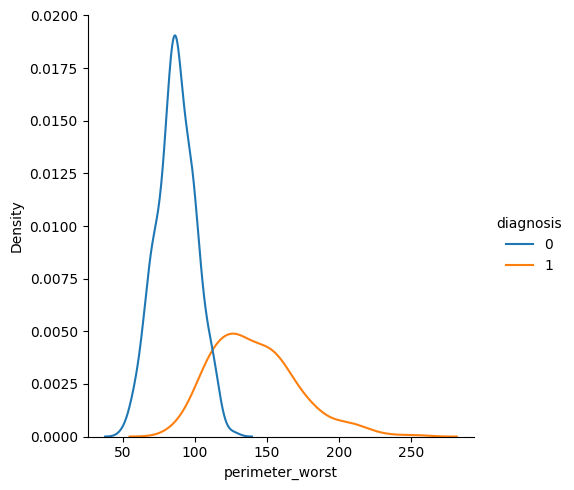

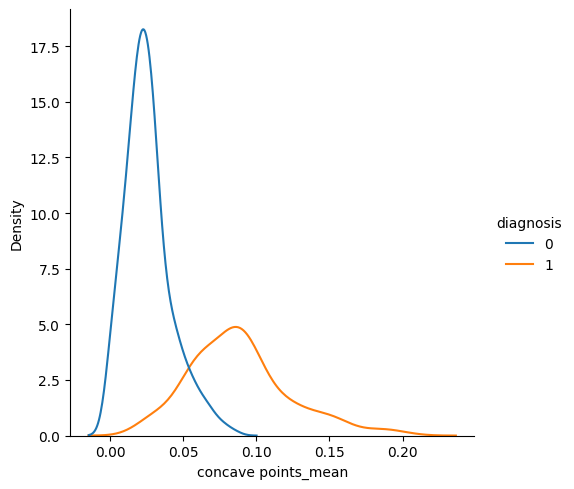

In [104]:
sns.displot(x=df['concave points_worst'], hue=df['diagnosis'], kind='kde')
sns.displot(x=df['perimeter_worst'], hue=df['diagnosis'], kind='kde')
sns.displot(x=df['concave points_mean'], hue=df['diagnosis'], kind='kde')
plt.show()

We can see from the above plots that Malignant cases have concavity values.

## Correlation Analysis

Let's try to understand the dataset features and filter out the unnacessary ones for a more compact analysis.


In [105]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


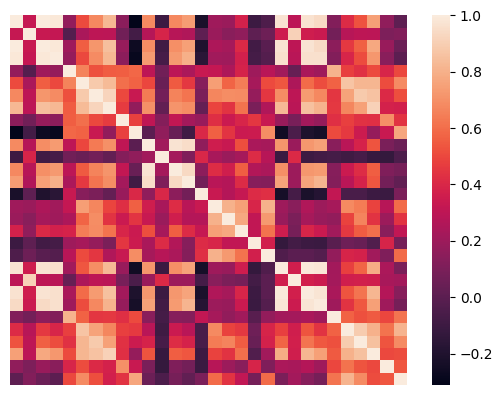

In [106]:
sns.heatmap(df.drop(columns=['id', 'diagnosis']).corr(method='pearson'), xticklabels='', yticklabels='')
plt.show()

The above heatmap suggests high correlation between multiple features. This can result in overfitting since we only have a small amount of records.

## Dimensionality Reduction

To reduce redundancy, we use PCA to perform dimensionality reduction.

In [107]:
x = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

In [108]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [109]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [110]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [111]:
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df.head(3)

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174


In [112]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

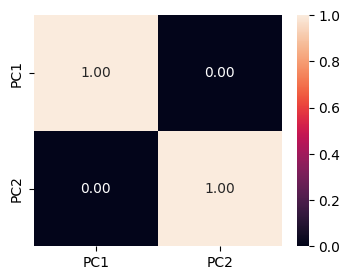

In [113]:
plt.figure(figsize=(4, 3))
sns.heatmap(pca_df.corr(method='pearson'), annot=True, fmt='.2f')
plt.show()

As can be seen from the above heatmap, dimensionality reduction helped us achieve two things.

 - Reduce the overall number of columns from `32` to `2`.
 - Remove correlation between columns.

In [114]:
pca_df['target'] = y
pca_df.head(3)

,PC1,PC2,target
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1


In [116]:
# save to csv
SAVE_PATH = '/content/drive/MyDrive/Colab Notebooks/Projects/dmodel-breast-cancer'
filename = 'breast_cancer_pca.csv'
try:
  pca_df.to_csv(f"{SAVE_PATH}/{filename}", index=False)
  print(f'Saved to {SAVE_PATH}/{filename}')
except Exception as e:
  print(f'Error saving csv: {e}')

Saved to /content/drive/MyDrive/Colab Notebooks/Projects/dmodel-breast-cancer/breast_cancer_pca.csv
